In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
f=fits.open("./weather_STRIP.fits")

In [3]:
seasonal_matrix_50 = np.empty(shape=[12, 24])
seasonal_matrix_68 = np.empty(shape=[12, 24])
seasonal_matrix_90 = np.empty(shape=[12, 24])

for i in range(1, 13):
    for j in range(0, 24):
        tqv_cdf=f[i].data['TQV'][j, 50]
        seasonal_matrix_50[i-1, j] =tqv_cdf
        
        tqv_cdf=f[i].data['TQV'][j, 68]
        seasonal_matrix_68[i-1, j] =tqv_cdf
        
        tqv_cdf=f[i].data['TQV'][j, 90]
        seasonal_matrix_90[i-1, j] =tqv_cdf
   

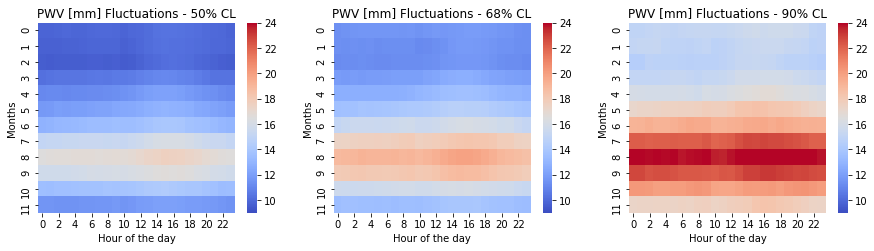

In [4]:
plt.figure(figsize=(15, 3.5))

plt.subplot(131)
plt.title("PWV [mm] Fluctuations - 50% CL")
sns.heatmap(seasonal_matrix_50, cmap="coolwarm", vmin=9, vmax=24)
plt.xlabel("Hour of the day")
plt.ylabel("Months")

plt.subplot(132)
plt.title("PWV [mm] Fluctuations - 68% CL")
sns.heatmap(seasonal_matrix_68, cmap="coolwarm", vmin=9, vmax=24)
plt.xlabel("Hour of the day")
plt.ylabel("Months")

plt.subplot(133)
plt.title("PWV [mm] Fluctuations - 90% CL")
sns.heatmap(seasonal_matrix_90, cmap="coolwarm", vmin=9, vmax=24)
plt.xlabel("Hour of the day")
plt.ylabel("Months")

plt.savefig("Seasonal_matrix.svg", format="svg")


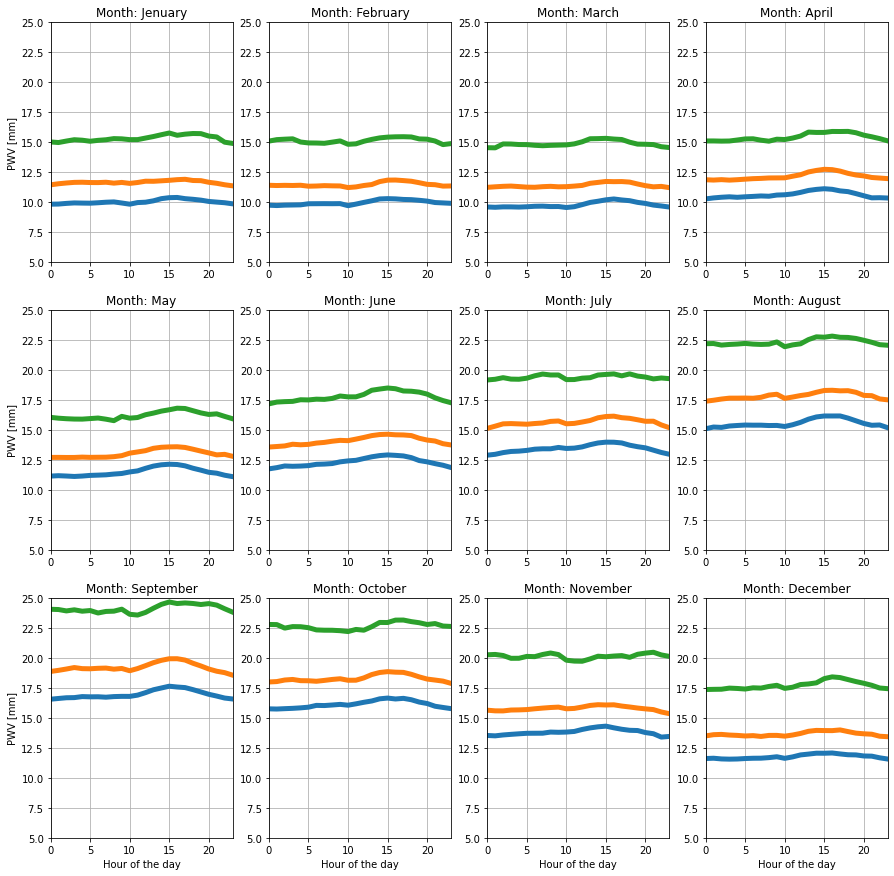

In [5]:
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 5
months = ["Jenuary", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

layout = np.zeros((3, 4), dtype=int)
for i in range(3):
    for j in range(4):
        layout[i, j] = 4*i + j + 1
axd = plt.figure(figsize=(15,15)).subplot_mosaic(layout, empty_sentinel=0)
for i in range(3):
    for j in range(4):
        axd[layout[i, j]].plot(seasonal_matrix_50[4*i+j,:])
        axd[layout[i, j]].plot(seasonal_matrix_68[4*i+j,:])
        axd[layout[i, j]].plot(seasonal_matrix_90[4*i+j,:])
        axd[layout[i, j]].set_ylim((5, 25))
        axd[layout[i, j]].set_xlim((0, 23))
        axd[layout[i, j]].set_title("Month: "+months[4*i+j])
        if (4*i+j) % 4 == 0:
            axd[layout[i, j]].set_xlabel("")
            axd[layout[i, j]].set_ylabel("PWV [mm]")
        if i == 2:
            axd[layout[i, j]].set_xlabel("Hour of the day")
        axd[layout[i, j]].grid()
            
plt.savefig("Months_plot.svg", format="svg")
            

In [6]:
# Create an average using 120 years of data realizations
!/usr/local/bin/mpirun --use-hwthread-cpus python make_average.py

Start to make average from 1900 to 2020...
You have to free at least: 7.119140625 MB
Comunicator size: 12
Years per thread: 10
Thread: 3 has taken in charge the year 1931
Thread: 4 has taken in charge the year 1941
Thread: 5 has taken in charge the year 1951
Thread: 6 has taken in charge the year 1961
Thread: 7 has taken in charge the year 1971
Thread: 8 has taken in charge the year 1981
Thread: 9 has taken in charge the year 1991
Thread: 10 has taken in charge the year 2001
Thread: 11 has taken in charge the year 2011
Thread: 0 has taken in charge the year 1901
Thread: 1 has taken in charge the year 1911
Thread: 2 has taken in charge the year 1921
Thread: 8 has taken in charge the year 1982
Thread: 3 has taken in charge the year 1932
Thread: 2 has taken in charge the year 1922
Thread: 9 has taken in charge the year 1992
Thread: 6 has taken in charge the year 1962
Thread: 4 has taken in charge the year 1942
Thread: 7 has taken in charge the year 1972
Thread: 1 has taken in charge the y

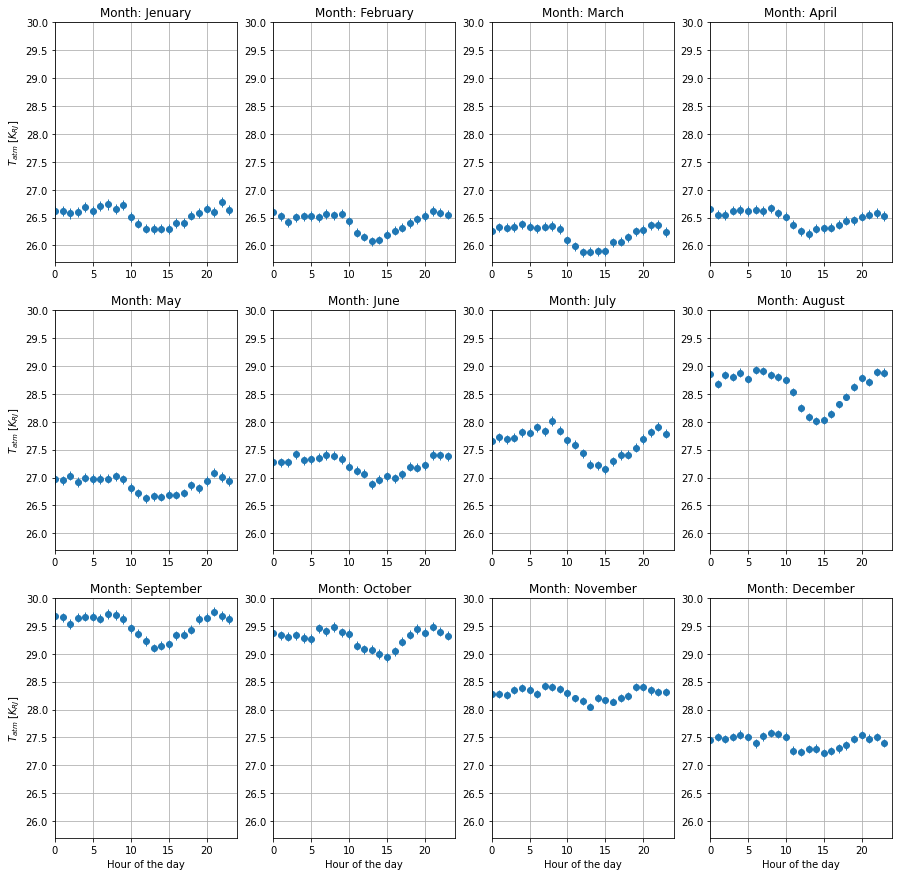

In [6]:
t_atm_40GHz_K = np.load("t_atm_par.npy")
mpl.rcParams['lines.linewidth'] = 1
t_atm_40GHz = np.median(t_atm_40GHz_K, axis=2)
std_dev = np.std(t_atm_40GHz_K[:, :, :], axis=2)/27
layout = np.zeros((3, 4), dtype=int)

years = 121
samples = 28

for i in range(3):
    for j in range(4):
        layout[i, j] = 4*i + j + 1
axd = plt.figure(figsize=(15,15)).subplot_mosaic(layout, empty_sentinel=0)
for i in range(3):
    for j in range(4):
        axd[layout[i, j]].errorbar(range(0, 24),t_atm_40GHz[i*4+j, :], std_dev[i-4+j, :], fmt='o')
        axd[layout[i, j]].set_xlim((0, 24))
        axd[layout[i, j]].set_title("Month: "+months[4*i+j])
        if (4*i+j) % 4 == 0:
            axd[layout[i, j]].set_xlabel("")
            axd[layout[i, j]].set_ylabel("$T_{atm}$ [$K_{RJ}$]")
        if i == 2:
            axd[layout[i, j]].set_xlabel("Hour of the day")
        axd[layout[i, j]].grid()
        
        if i == 0:
            axd[layout[i, j]].set_ylim((25.7, 30))
        if i == 1:
            axd[layout[i, j]].set_ylim((25.7, 30))
        if i == 2:
            axd[layout[i, j]].set_ylim((25.7, 30))
            
            

In [7]:
# The LSPE/STRIP Focalplane

import yaml
import numpy as np
with open(r'/home/algebrato/.julia/dev/Stripeline/instrumentdb/strip_focal_plane.yaml') as file:
    focal_plane = yaml.full_load(file)
    
with open(r'/home/algebrato/.julia/dev/Stripeline/instrumentdb/strip_detectors.yaml') as file:
    detectors = yaml.full_load(file)

In [8]:
def bandshape(focal_plane, detectors, det):
    id_pol = focal_plane['horns'][det]['polarimeter_id']
    for i in detectors:
        if i['id'] == id_pol:
            bandshape = i['bandpass']['bandshape']
            banderror = i['bandpass']['bandshape_error']
            f_max = i['bandpass']['highest_frequency_hz']
            f_min = i['bandpass']['lowest_frequency_hz']
            samples = i['bandpass']['num_of_frequencies']
            
            freq = np.linspace(f_min, f_max, samples)
            
    return freq, bandshape, banderror
    

In [9]:
Q_detectors = ["B0", "B1", "B2", "B3", "B4", "B5", "B6",
               "G0", "G1", "G2", "G3", "G4", "G5", "G6",
               "I0", "I1", "I2", "I3", "I4", "I5", "I6",
               "O0", "O1", "O2", "O3", "O4", "O5", "O6",
               "R0", "R1", "R2", "R3", "R4", "R5", "R6",
               "V0", "V1", "V2", "V3", "V4", "V5", "V6",
               "Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6"]
for i in Q_detectors:
    print(i)
freq_I0, band_I0, err

B0
B1
B2
B3
B4
B5
B6
G0
G1
G2
G3
G4
G5
G6
I0
I1
I2
I3
I4
I5
I6
O0
O1
O2
O3
O4
O5
O6
R0
R1
R2
R3
R4
R5
R6
V0
V1
V2
V3
V4
V5
V6
Y0
Y1
Y2
Y3
Y4
Y5
Y6


NameError: name 'freq_I0' is not defined

In [10]:
Q_detectors = ["B0", "B1", "B2", "B3", "B4", "B5", "B6",
               "G0", "G1", "G2", "G3", "G4", "G5", "G6",
               "I0", "I1", "I2", "I3", "I4", "I5", "I6",
               "O0", "O1", "O2", "O3", "O4", "O5", "O6",
               "R0", "R1", "R2", "R3", "R4", "R5", "R6",
               "V0", "V1", "V2", "V3", "V4", "V5", "V6",
               "Y0", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6"]
for i in Q_detectors:
    print(i)
freq_I0, band_I0, err_I0=bandshape(focal_plane, detectors, 'I0')
freq_I0 = np.array(freq_I0)
band_I0 = np.array(band_I0)
err_I0 = np.array(err_I0)

B0
B1
B2
B3
B4
B5
B6
G0
G1
G2
G3
G4
G5
G6
I0
I1
I2
I3
I4
I5
I6
O0
O1
O2
O3
O4
O5
O6
R0
R1
R2
R3
R4
R5
R6
V0
V1
V2
V3
V4
V5
V6
Y0
Y1
Y2
Y3
Y4
Y5
Y6


In [11]:
import pycal
t_atm = pycal.atm_atmospheric_loading(2390.0, 293, 101500, 2, 43)
print(t_atm)

24.704680537823386


In [12]:
t_atm_band = pycal.atm_atmospheric_loading_vec(2390.0, 293, 101500, 2, np.amin(freq_I0/1e9), np.amax(freq_I0/1e9), len(freq_I0))

NameError: name 'index' is not defined

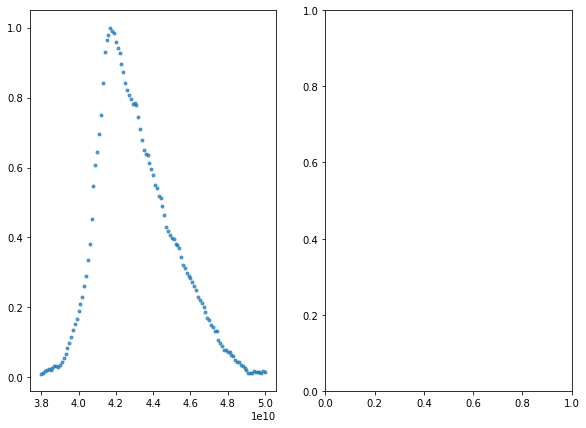

In [13]:
plt.figure(figsize=(15,7))
plt.subplot(131)
plt.plot(freq_I0, band_I0, '.', alpha=0.7)
#plt.fill_between(freq_I0, band_I0 - err_I0, band_I0 + err_I0, alpha=0.3)
plt.subplot(132)
plt.plot(freq_I0[index], band_I0[index], '.', alpha=0.7)
#plt.plot(freq_I0, t_atm_band)
plt.subplot(133)
#plt.plot(freq_I0, band_I0*t_atm_band)

# from scipy.integrate import simps
# Temp = simps(band_I0*t_atm_band, freq_I0) / simps(band_I0, freq_I0)
# print(Temp)

In [14]:
print(len(band_I0))

index= np.round(np.linspace(0, 120, 60))
index = inx
print(len(index))

121


NameError: name 'inx' is not defined

In [15]:
index

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,
        45.,  47.,  49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,  65.,
        67.,  69.,  71.,  73.,  75.,  77.,  79.,  81.,  83.,  85.,  87.,
        89.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108., 110.,
       112., 114., 116., 118., 120.])